In [71]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
X_train = pd.read_csv('../data/sentence-relations/train.csv', index_col='id')
y_train = X_train['label']
X_test = pd.read_csv('../data/sentence-relations/test.csv', index_col='id')
y_test = pd.read_csv('../data/sentence-relations/sample_submission.csv', index_col='id')

In [73]:
# use nltk for tokenization of train data

# tokenize the text
X_train_tokenized = (X_train['premise'] + ' ' + X_train['hypothesis']).apply(word_tokenize)
X_test_tokenized = (X_test['premise'] + ' ' + X_test['hypothesis']).apply(word_tokenize)
print(X_train_tokenized.head())

# vectorize the dataframes
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_tokenized.apply(lambda x: ' '.join(x)))
X_test_vectorized = vectorizer.transform(X_test_tokenized.apply(lambda x: ' '.join(x)))

id
5130fd2cb5    [and, these, comments, were, considered, in, f...
5b72532a0b    [These, are, issues, that, we, wrestle, with, ...
3931fbe82a    [Des, petites, choses, comme, celles-là, font,...
5622f0c60b    [you, know, they, ca, n't, really, defend, the...
86aaa48b45    [ในการเล่นบทบาทสมมุติก็เช่นกัน, โอกาสที่จะได้แ...
dtype: object


In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_train_vectorized, y_train, test_size=0.2, random_state=0)

In [81]:
def get_best_decision_tree():
    param_dist = {
        'max_depth': [4,8,16,32],
        'min_samples_split': [5, 10, 20, 30, 40],
        'criterion': ['gini', 'entropy']
    }

    random_search = GridSearchCV(DecisionTreeClassifier(random_state=0),
                                    param_dist,
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    cv=3,                                        # 3-fold cross validation
                                    return_train_score=True)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    print('Best hyperparameters:', random_search.best_params_)

    return best_model

def get_best_random_forest():
    param_dist = {
        'n_estimators': [50, 100, 200],
        'max_depth': [4,8,16,32],
        'min_samples_split': [5, 10, 20, 30, 40],
        'criterion': ['gini', 'entropy']
    }

    random_search = GridSearchCV(RandomForestClassifier(random_state=0),
                                    param_dist,
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    cv=3,                                        # 3-fold cross validation
                                    return_train_score=True)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    print('Best hyperparameters:', random_search.best_params_)

    return best_model

def get_best_gradient_boosting():
    param_dist = {
        'n_estimators': [25],
        'max_depth': [4,8,16],
        'min_samples_split': [5, 10, 20, 30, 40]
    }

    random_search = GridSearchCV(GradientBoostingClassifier(random_state=0),
                                    param_dist,
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    cv=3,                                        # 3-fold cross validation
                                    return_train_score=True)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    print('Best hyperparameters:', random_search.best_params_)

    return best_model

In [69]:
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print('Accuracy:', accuracy)

    plt.figure(figsize=(5,5))
    plt.imshow(confusion_matrix(y_val, y_pred), cmap='Blues')
    plt.colorbar()
    plt.grid(False)
    plt.xlabel('Predicted')
    plt.ylabel('Groud Truth')
    plt.xticks(range(3), ['contradiction', 'neutral', 'entailment'], fontsize=12)
    plt.yticks(range(3), ['contradiction', 'neutral', 'entailment'], fontsize=12)
    plt.show()

    return accuracy

Best hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 40}
Accuracy: 0.3849009900990099


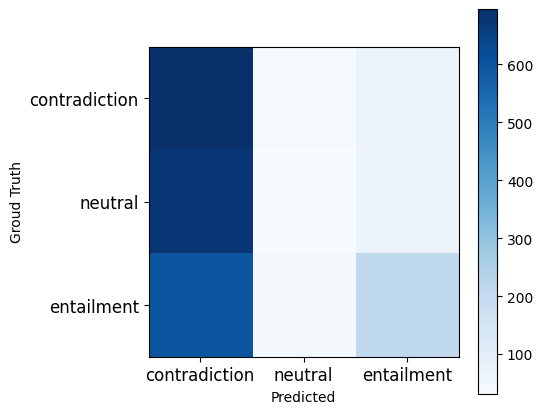

0.3849009900990099

In [70]:
evaluate_model(get_best_decision_tree(), X_val, y_val)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 32, 'min_samples_split': 40, 'n_estimators': 200}
Accuracy: 0.37623762376237624


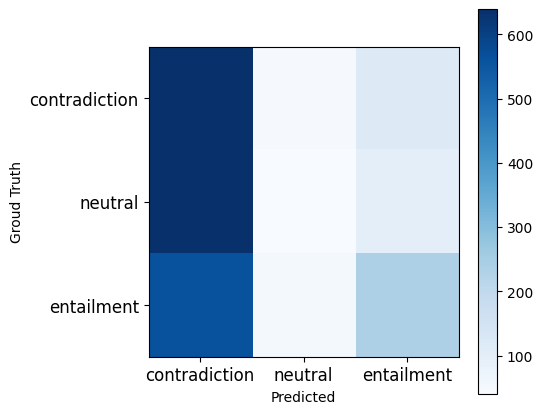

0.37623762376237624

In [77]:
evaluate_model(get_best_random_forest(), X_val, y_val)

Best hyperparameters: {'max_depth': 8, 'min_samples_split': 20, 'n_estimators': 25}
Accuracy: 0.41542904290429045


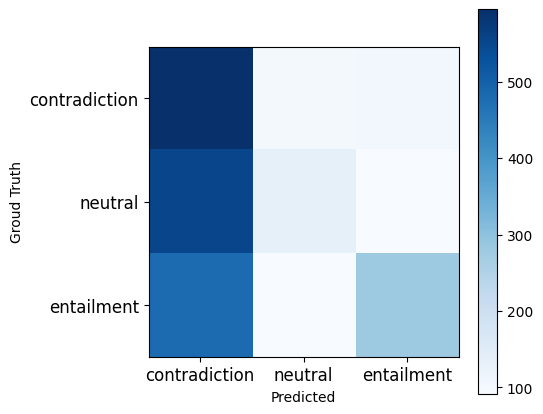

0.41542904290429045

In [82]:
evaluate_model(get_best_gradient_boosting(), X_val, y_val)